# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

# **Lancé via google collab**

In [65]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np,matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#ajout d'une option pour voir les float64 sans formatage scientifique
pd.set_option('display.float_format', '{:.4f}'.format)
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [66]:
#On importe les données dans un dataframe
dataset_url = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/historique_immobilier_paris_2017_2021_vdef2.xlsx"
df_histo = pd.read_excel(dataset_url)


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [67]:
df_histo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,550559.6781,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1576492.4589,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,657757.3562,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,250086.8233,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,176266.7075,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [68]:
#On vérifie que le type des données attribué par pandas est cohérent
df_histo.dtypes

,0
date_mutation,datetime64[ns]
valeur_fonciere,float64
adresse_numero,int64
adresse_nom_voie,object
code_postal,int64
nom_commune,object
code_type_local,int64
type_local,object
surface_reelle,int64


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [69]:
print(f'la liste des différents types de biens immobiliers que nous avons dans les données est\n {df_histo["type_local"].unique()},\nsoit {len(df_histo["type_local"].unique())} valeures disctinctes')



la liste des différents types de biens immobiliers que nous avons dans les données est
 ['Appartement' 'Local industriel. commercial ou assimilé'],
soit 2 valeures disctinctes


In [70]:
code_type=df_histo["code_type_local"].unique().tolist()

print(code_type)

[2, 4]


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 ou 4.

### 3. Nombre de transactions

In [71]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print(f'le nombre de transactions dans les données est {format(df_histo.shape[0])}')
print(f'le nombre de transactions pour les appartements dans les données est {format(df_histo[df_histo["type_local"]=="Appartement"].shape[0])}')
print(f'le nombre de transactions pour les locaux commerciaux dans les données est {format(df_histo[df_histo["type_local"]=="Local industriel. commercial ou assimilé"].shape[0])}')

le nombre de transactions dans les données est 26196
le nombre de transactions pour les appartements dans les données est 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [72]:
#On vérifie également la plage de l'historique disponible
premiere_date=df_histo["date_mutation"].min().date()
derniere_date=df_histo["date_mutation"].max().date()
print(f'la première date de transaction dans les données est le {premiere_date}')
print(f'la dernière date de transaction dans les données est le {derniere_date}')

la première date de transaction dans les données est le 2017-01-02
la dernière date de transaction dans les données est le 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [73]:
# Calcul de la colonne
df_histo["prixM2"]=df_histo["valeur_fonciere"]/df_histo["surface_reelle"]
df_histo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prixM2
0,2017-01-03,550559.6781,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.1936
1,2017-01-12,1576492.4589,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.7329
2,2017-01-10,657757.3562,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.0205
3,2017-01-10,250086.8233,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.5829
4,2017-01-13,176266.7075,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.1138


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [74]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_histo_appart=df_histo.loc[df_histo["type_local"]=="Appartement",["date_mutation","code_postal","valeur_fonciere","surface_reelle","prixM2"]]
print(df_histo_appart.head())
print (f"\nnombre de lignes {df_histo_appart.shape[0]}")

  date_mutation  code_postal  valeur_fonciere  surface_reelle     prixM2
0    2017-01-03        75003      550559.6781              50 11011.1936
1    2017-01-12        75008     1576492.4589             163  9671.7329
2    2017-01-10        75008      657757.3562              66  9966.0205
3    2017-01-10        75003      250086.8233              22 11367.5829
4    2017-01-13        75001      176266.7075              15 11751.1138

nombre de lignes 24353


In [75]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_group_appart = df_histo_appart.groupby(df_histo_appart["date_mutation"].dt.year).agg({
    "prixM2": "mean",
    "surface_reelle": "mean"
}).reset_index()
#renomage des champs
df_group_appart = df_group_appart.rename(columns={
    "date_mutation": "annee",
    "prixM2": "prix_moyen",
    "surface_reelle": "surface_moyenne"
})

df_group_appart.head()

,annee,prix_moyen,surface_moyenne
0,2017,9492.8592,44.6277
1,2018,10031.4034,44.2717
2,2019,10562.7126,43.3616
3,2020,10674.8727,42.9007
4,2021,10455.6001,43.4799


On constate sur la moyenne des prix de vente des appartements à Paris cela augmente jusqu'en 2020 avant de redescendre <br>
Nous allons créer un graphique pour mieux le visualiser.

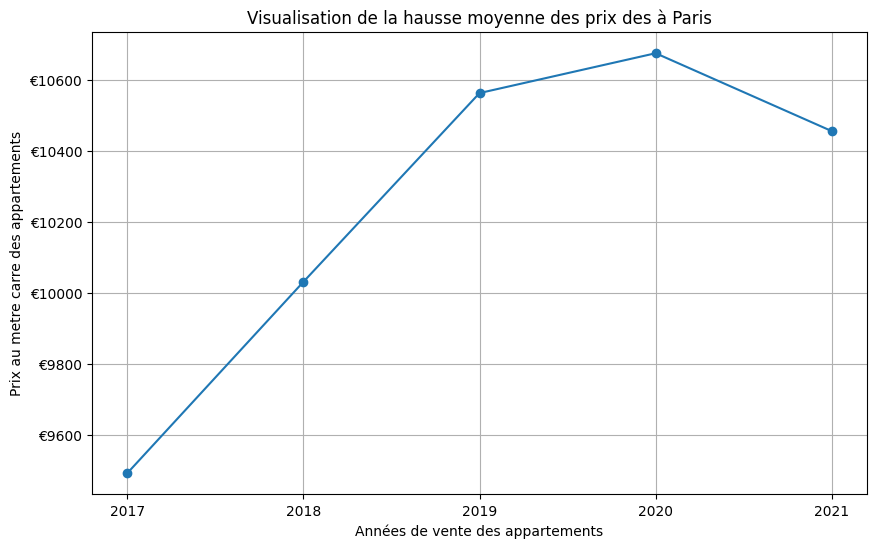

In [76]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
plt.plot(df_group_appart['annee'],df_group_appart['prix_moyen'],marker='o')
plt.xlabel('Années de vente des appartements')
plt.xticks(df_group_appart['annee'])
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [77]:
#Liste des codes postaux dans nos données.
df_histo["code_postal"].unique()

array([75003, 75008, 75001, 75006, 75005, 75007, 75010, 75009, 75011,
       75012, 75013, 75014, 75015, 75016, 75017, 75018, 75020, 75019,
       75004, 75002])

In [78]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_histo_arrondissement=df_histo.loc[df_histo["type_local"]=="Appartement",["date_mutation","valeur_fonciere","surface_reelle","prixM2","code_postal"]]
df_histo_arrondissement.head()

,date_mutation,valeur_fonciere,surface_reelle,prixM2,code_postal
0,2017-01-03,550559.6781,50,11011.1936,75003
1,2017-01-12,1576492.4589,163,9671.7329,75008
2,2017-01-10,657757.3562,66,9966.0205,75008
3,2017-01-10,250086.8233,22,11367.5829,75003
4,2017-01-13,176266.7075,15,11751.1138,75001


In [79]:
df_group_cp = df_histo_arrondissement.groupby([df_histo_arrondissement["code_postal"],df_histo_arrondissement["date_mutation"].dt.year]).agg({
    "prixM2": "mean",
    "surface_reelle": "mean"
}).reset_index()
df_group_cp = df_group_cp.rename(columns={
    "code_postal": "arrondissement",
    "date_mutation": "annee",
    "prixM2": "prix_moyen",
    "surface_reelle": "surface_moyenne"
})
df_group_cp.head()

,arrondissement,annee,prix_moyen,surface_moyenne
0,75001,2017,11762.7063,45.2414
1,75001,2018,12621.2261,46.0102
2,75001,2019,13269.2561,34.3077
3,75001,2020,13405.9918,44.8714
4,75001,2021,13379.4986,47.7778


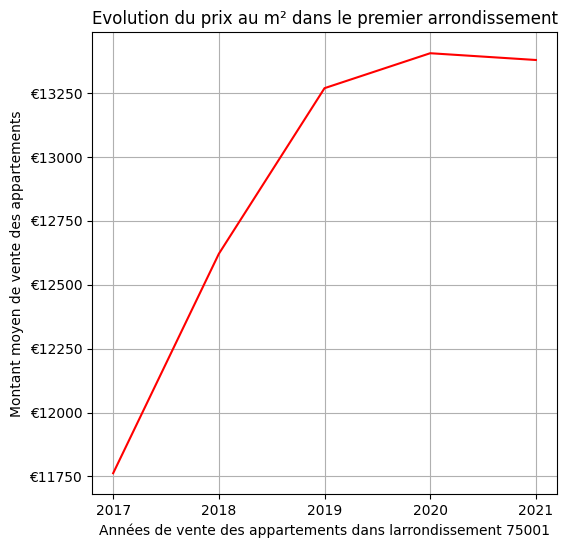

In [80]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
df_75001 = df_group_cp[df_group_cp['arrondissement'] == 75001]
plt.figure(figsize=(6,6))
plt.plot(df_75001['annee'],df_75001['prix_moyen'],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.xticks(df_75001['annee'])
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

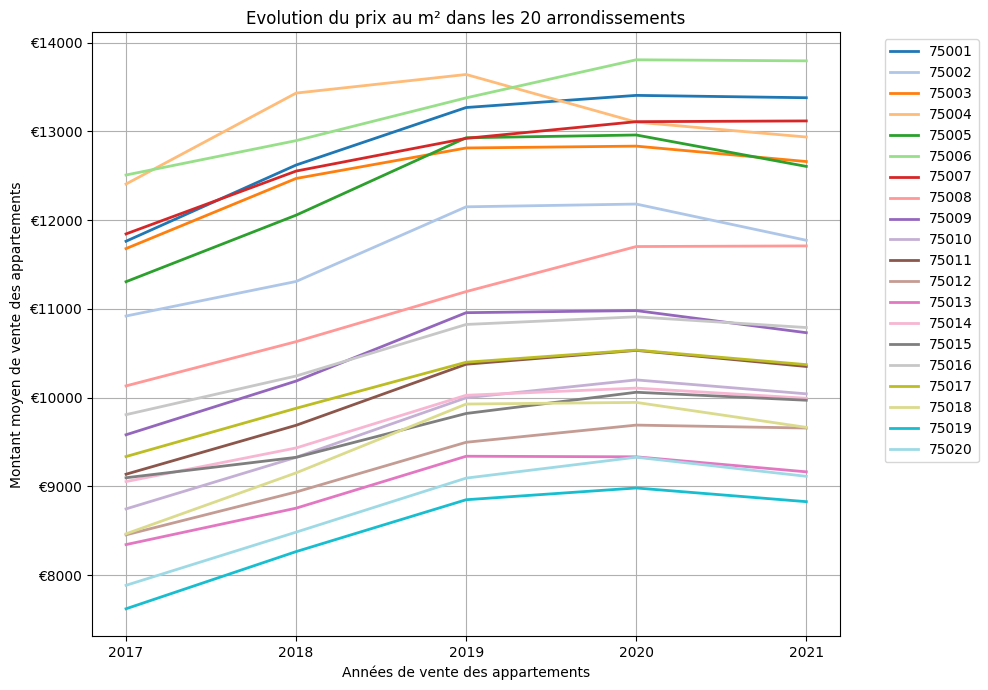

In [81]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(10,7))
plt.xticks(df_75001['annee'])
#Insérer les lignes à tracer ci-dessous
codes_postaux = df_group_cp['arrondissement'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(codes_postaux)))
for i, cp in enumerate(codes_postaux):
    df_cp = df_group_cp[df_group_cp['arrondissement'] == cp]
    plt.plot(df_cp['annee'], df_cp['prix_moyen'],
             color=colors[i], label=f'{cp}', linewidth=2)

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

On observe que globalement une hausse constante jusqu'en 2019, un ralentissement puis une légere tendance a la baisse/stagnation  en 20/21

### 7. Prix au metre carré par transaction dans un arrondissement

In [82]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
transaction_75006=df_histo[df_histo["code_postal"]==75006].shape[0]
pourcentage_transaction=(df_histo[df_histo["code_postal"]==75006].shape[0]/df_histo.shape[0])*100
print(f"nbr de transactions dans le 6 eme: {transaction_75006}  soit {pourcentage_transaction:.2f} % des transactions totales")


nbr de transactions dans le 6 eme: 782  soit 2.99 % des transactions totales


On constate 782 transactions, soit 2,99% des transactions totales ce qui est peu. Il semble y avoir peu de transactions dans cet arrondissement

Affichons l'historique des transactions pour visualiser la dispersion des données :

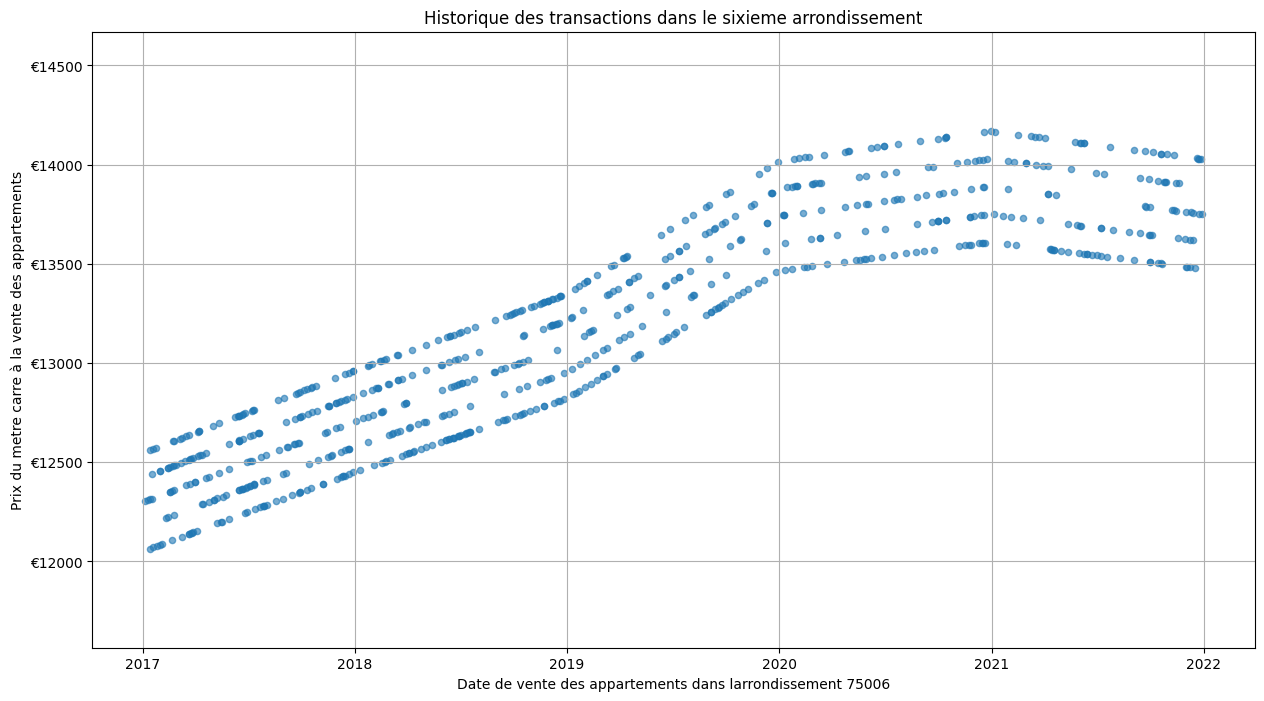

In [83]:
cp=75006
plt.figure(figsize=(15,8))
#Insérer ci-dessous le scatter plot
df_75006 = df_histo_appart[df_histo_appart['code_postal'] == cp]

# Scatter plot
plt.scatter(df_75006['date_mutation'], df_75006['prixM2'],alpha=0.6, s=20)


plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(min(df_75006['prixM2'])-500,max(df_75006['prixM2'])+500)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe une augmentation constante entre 2017 et 2020, un ralentissement pour 2020-2021 et une légere baisse pour 21/22. l'ensemble semble tres linéaire

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [84]:
#On calcule la corrélation de Pearson
from scipy import stats
x = df_75006['date_mutation'].dt.year

y = df_75006['prixM2']
corr_pearson, p_value = stats.pearsonr(x, y)

print("Coefficient de corrélation de pearson :", corr_pearson)
print("Valeur p :", p_value)

Coefficient de corrélation de pearson : 0.891624211404072
Valeur p : 1.72353148828539e-245


Le coefficient de corrélation est de 0,89 avec une pvalue de 3.778258565945465e-254 (tres proche de 0) donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

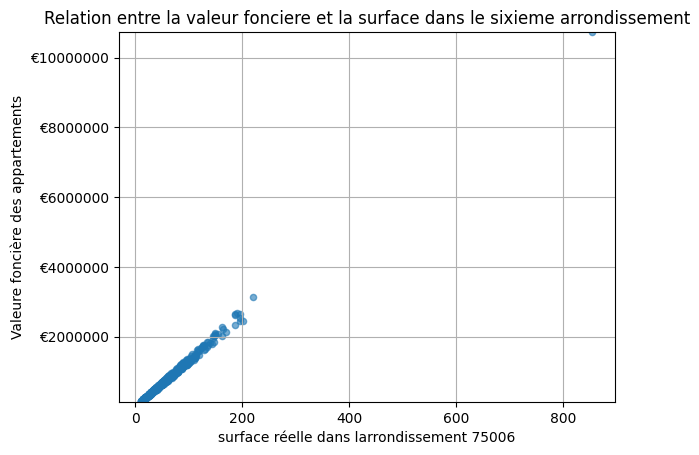

Coefficient de corrélation de pearson : 0.9977572898250298
Valeur p : 0.0


In [85]:
x = df_75006['surface_reelle']
y = df_75006['valeur_fonciere']

# Scatter plot
plt.scatter(x, y,alpha=0.6, s=20)


plt.xlabel('surface réelle dans larrondissement 75006')
plt.ylabel('Valeure foncière des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(min(df_75006['valeur_fonciere'])-500,max(df_75006['valeur_fonciere'])+500)
plt.grid(which='both')
plt.title('Relation entre la valeur fonciere et la surface dans le sixieme arrondissement')
plt.show()




corr_pearson, p_value = stats.pearsonr(x, y)
print("Coefficient de corrélation de pearson :", corr_pearson)
print("Valeur p :", p_value)

Le coefficient de corrélation est de 0,99 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [86]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_histo_locaux=df_histo.loc[df_histo["type_local"]=="Local industriel. commercial ou assimilé",["date_mutation","code_postal","valeur_fonciere","surface_reelle","prixM2"]]
print(df_histo_locaux.head())
print (f"\nnombre de lignes {df_histo_locaux.shape[0]}")

    date_mutation  code_postal  valeur_fonciere  surface_reelle     prixM2
18     2017-02-01        75003     3113277.2979             250 12453.1092
29     2017-02-17        75003     1164375.2601              95 12256.5817
34     2017-02-20        75003      380252.1877              31 12266.1996
91     2017-03-09        75001      362384.1748              29 12496.0060
109    2017-03-29        75003      315907.2257              25 12636.2890

nombre de lignes 1843


In [87]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_group_locaux = df_histo_locaux.groupby(df_histo_locaux["date_mutation"].dt.year).agg({
    "prixM2": "mean",
    "surface_reelle": "mean"
}).reset_index()
#renomage des champs
df_group_locaux = df_group_locaux.rename(columns={
    "date_mutation": "annee",
    "prixM2": "prix_moyen",
    "surface_reelle": "surface_moyenne"
})

df_group_locaux.head()

,annee,prix_moyen,surface_moyenne
0,2017,10949.9092,89.9914
1,2018,11569.4992,88.0969
2,2019,11960.1321,82.8264
3,2020,11966.4702,85.6310
4,2021,12006.4887,92.8320


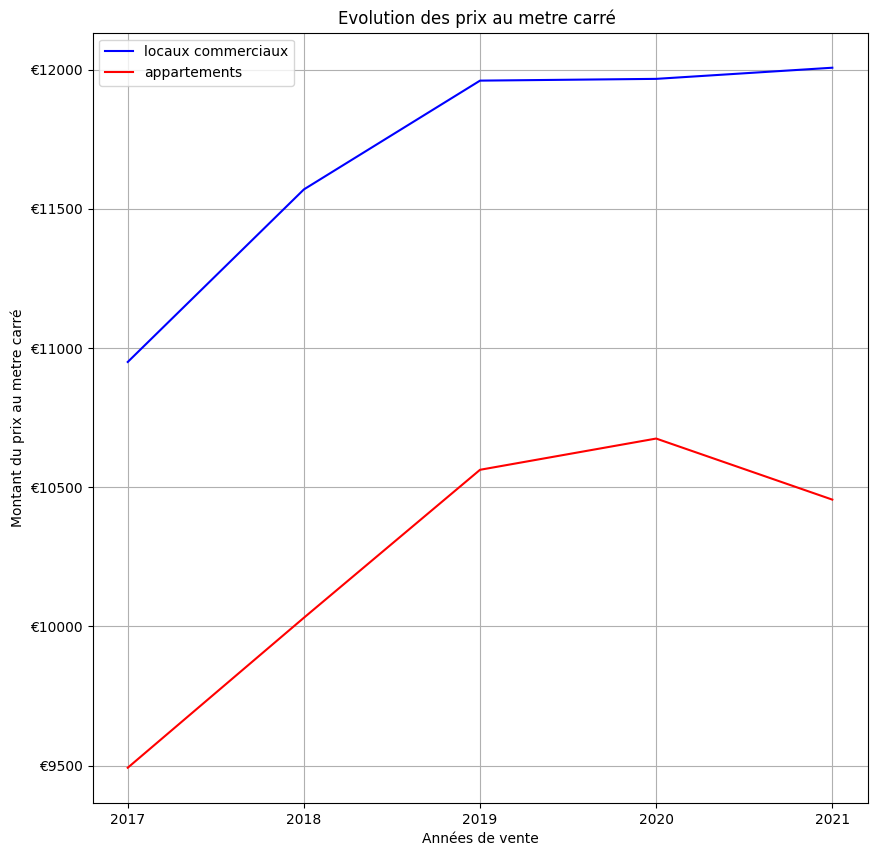

In [88]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_group_locaux['prix_moyen'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_group_appart['prix_moyen'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

In [89]:
moyenne_prix_locaux=df_group_locaux['prix_moyen'].mean()

print(f"{moyenne_prix_locaux:.2f}")

11690.50


Le prix au metre carré des locaux commerciaux est 11690.50€

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.

test de multicollinéarité des variables pour valider leur indépendances entre elles

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
X=df_histo[['prixM2','surface_reelle','date_mutation','code_postal','code_type_local']].copy()
X['annee'] = X['date_mutation'].dt.year
X = X.drop('date_mutation', axis=1)
#Standardiser les variables (recommandé pour VIF)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                       columns=X.columns)
# Fonction: Calculer le VIF pour chaque variable
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(len(df.columns))]
    return vif_data
#calcul du vif:
vif_results = calculate_vif(X_scaled)
print("Résultats du test VIF:")
print(vif_results)

# Étape 5: Interprétation
print("\n--- Interprétation ---")
print("VIF < 5 : Pas de multicollinéarité préoccupante")
print("5 ≤ VIF < 10 : Multicollinéarité modérée")
print("VIF ≥ 10 : Multicollinéarité élevée (problématique)")

# Identifier les variables avec forte multicollinéarité
high_vif = vif_results[vif_results['VIF'] >= 10]
if not high_vif.empty:
    print(f"\n Variables avec VIF élevé (≥ 10):")
    print(high_vif)
else:
    print("\n Aucune multicollinéarité élevée détectée")


Résultats du test VIF:
          Variable    VIF
0           prixM2 3.1338
1   surface_reelle 1.0540
2      code_postal 2.7240
3  code_type_local 1.1683
4            annee 1.2463

--- Interprétation ---
VIF < 5 : Pas de multicollinéarité préoccupante
5 ≤ VIF < 10 : Multicollinéarité modérée
VIF ≥ 10 : Multicollinéarité élevée (problématique)

 Aucune multicollinéarité élevée détectée


# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_histo_reg = df_histo[['surface_reelle', 'code_postal', 'type_local', 'valeur_fonciere','date_mutation']].copy()
df_histo_reg = df_histo_reg.dropna()
df_histo_reg['timestamp'] = df_histo_reg['date_mutation'].dt.tz_localize('UTC').astype('int64') // 10**9 #encode le temps en secondes depuis 1970
df_histo_reg = df_histo_reg.drop('date_mutation', axis=1)

X = df_histo_reg[['surface_reelle', 'code_postal', 'type_local','timestamp']].copy()
y = df_histo_reg['valeur_fonciere']

# Transformation des colonnes catégoriques en variables binaires
X = pd.get_dummies(X, columns=['code_postal', 'type_local'], dtype=int)

In [92]:
df_histo_reg.head()

,surface_reelle,code_postal,type_local,valeur_fonciere,timestamp
0,50,75003,Appartement,550559.6781,1483401600
1,163,75008,Appartement,1576492.4589,1484179200
2,66,75008,Appartement,657757.3562,1484006400
3,22,75003,Appartement,250086.8233,1484006400
4,15,75001,Appartement,176266.7075,1484265600


je verifie l'encodage du code postal et du type de bien

In [93]:
X.head()

,surface_reelle,timestamp,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,50,1483401600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,163,1484179200,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,66,1484006400,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,22,1484006400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15,1484265600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

Ajout: Gridsearch pour valider l'utilisation de notre algo

In [94]:
# --- utilisation de gridsearch pour tester plusieurs modeles et différents parametres
#---(durée: environ 1 minutes sous google collab en reduisant les iters de lasso pour un resultat identique)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("\n--- Recherche des meilleurs paramètres avec GridSearchCV pour plusieurs modèles ---")
X.columns = X.columns.astype(str)

# 1. Linear Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

# 2. Lasso Regression
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=5000))
])
param_grid_lasso = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0],
    'regressor__fit_intercept': [True, False],
    'regressor__tol': [1e-3]
}

# 3. Ridge Regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
param_grid_ridge = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
    'regressor__fit_intercept': [True, False]
}

# Liste des modèles et de leurs grilles de paramètres
models_and_params = [
    (pipeline_lr, param_grid_lr, "Linear Regression"),
    (pipeline_lasso, param_grid_lasso, "Lasso Regression"),
    (pipeline_ridge, param_grid_ridge, "Ridge Regression")
]

best_estimators = {}
best_scores = {}

for pipeline, param_grid, model_name in models_and_params:
    print(f"\nExécution de GridSearchCV pour {model_name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='r2', n_jobs=-1)
    grid_search.fit(X, y)

    print(f"Meilleurs paramètres trouvés pour {model_name} : {grid_search.best_params_}")
    print(f"Meilleur score R² obtenu par GridSearchCV pour {model_name} : {grid_search.best_score_:.4f}")
    best_estimators[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_

print("\n--- Comparaison des meilleurs scores R² ---")
for model_name, score in best_scores.items():
    print(f"{model_name}: {score:.4f}")




--- Recherche des meilleurs paramètres avec GridSearchCV pour plusieurs modèles ---

Exécution de GridSearchCV pour Linear Regression...
Meilleurs paramètres trouvés pour Linear Regression : {'regressor__fit_intercept': True, 'regressor__positive': True}
Meilleur score R² obtenu par GridSearchCV pour Linear Regression : 0.9774

Exécution de GridSearchCV pour Lasso Regression...
Meilleurs paramètres trouvés pour Lasso Regression : {'regressor__alpha': 1.0, 'regressor__fit_intercept': True, 'regressor__tol': 0.001}
Meilleur score R² obtenu par GridSearchCV pour Lasso Regression : 0.9774

Exécution de GridSearchCV pour Ridge Regression...
Meilleurs paramètres trouvés pour Ridge Regression : {'regressor__alpha': 100.0, 'regressor__fit_intercept': True}
Meilleur score R² obtenu par GridSearchCV pour Ridge Regression : 0.9774

--- Comparaison des meilleurs scores R² ---
Linear Regression: 0.9774
Lasso Regression: 0.9774
Ridge Regression: 0.9774


Les différents modeles ramenent  le même score (0.9774)  on peux utiliser la régression linéaire avec ses parametres de base.

In [95]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test
# La valeur y à trouver est la valeur foncière

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train::',X_train.shape)
print('X_test:',X_test.shape)

X_train:: (17551, 24)
X_test: (8645, 24)


In [96]:
#conversion des données en str

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [97]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
reg=LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [98]:
#Integration de cross validation
from sklearn.model_selection import cross_val_score
print("\n--- Validation Croisée (sur l'ensemble d'entraînement X_train, y_train) ---")

# Évaluation avec R²
cv_r2_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(f"Scores R² de la validation croisée : {cv_r2_scores}")
print(f"Score R² moyen de la validation croisée : {cv_r2_scores.mean():.4f}")

# Évaluation avec Mean Squared Error (négatif car cross_val_score maximise)
cv_neg_mse_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Scores MSE négatifs de la validation croisée : {cv_neg_mse_scores}")
print(f"Score MSE moyen de la validation croisée : {-cv_neg_mse_scores.mean():.2f}")
print(f"Score RMSE moyen:{np.sqrt(-cv_neg_mse_scores.mean())}")
# --- FIN DE L'AJOUT POUR VALIDATION CROISÉE ---


--- Validation Croisée (sur l'ensemble d'entraînement X_train, y_train) ---
Scores R² de la validation croisée : [0.97290764 0.98473123 0.96507737 0.98229118 0.9747075 ]
Score R² moyen de la validation croisée : 0.9759
Scores MSE négatifs de la validation croisée : [-5.80387969e+09 -4.07203257e+09 -1.26780786e+10 -4.92329487e+09
 -5.86711112e+09]
Score MSE moyen de la validation croisée : 6668879363.89
Score RMSE moyen:81663.20691649192


La validation croisée a été effectuée sur l'ensemble d'entraînement pour évaluer la robustesse et la capacité de généralisation de notre modèle de régression linéaire.

Les résultats sont les suivants :
- **Scores R² individuels :** Les scores R² pour chacun des 5 plis sont [0.9729, 0.9847, 0.9651, 0.9823, 0.9747]. La consistance de ces scores élevés suggère une bonne stabilité du modèle.
- **Score R² moyen :** Le score R² moyen de 0.9759 indique que le modèle explique en moyenne environ 97.59% de la variance de la valeur foncière sur les données d'entraînement testées par validation croisée. C'est un indicateur de très bonne performance.

- **Score RMSE** : Nous obtenons un RMSE d'environ 81,663 €. Cela signifie que les prédictions du modèle s'écartent en moyenne de cette valeur par rapport aux valeurs foncières réelles dans l'ensemble d'entraînement.**

Ces résultats de validation croisée confirment la bonne performance observée initialement et indiquent que le modèle devrait bien généraliser sur de nouvelles données similaires.

In [99]:
# ---on va utiliser statsmodels pour avoir un resumé complet en un affichage des résultats ---
import statsmodels.api as sm
import pandas as pd

print("\n--- Analyse statistique du modèle avec StatsModels (sur l'ensemble d'entraînement) ---")

# Convertir les prix en milliers d'euros pour plus de lisibilité
y_train_k = y_train / 1000  # Diviser par 1000 pour avoir des milliers d'euros

X_train_sm = sm.add_constant(X_train)

model_sm = sm.OLS(y_train_k, X_train_sm)  # Utiliser y_train_k au lieu de y_train
results_sm = model_sm.fit()

print("RESULTATS EN MILLIERS D'EUROS (K€)")
print(results_sm.summary())



--- Analyse statistique du modèle avec StatsModels (sur l'ensemble d'entraînement) ---
RESULTATS EN MILLIERS D'EUROS (K€)
                            OLS Regression Results                            
Dep. Variable:        valeur_fonciere   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.565e+04
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:01:56   Log-Likelihood:            -1.0113e+05
No. Observations:               17551   AIC:                         2.023e+05
Df Residuals:                   17528   BIC:                         2.025e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t   

Performance globale du modèle :

Le R-squared est de 0.978, indiquant que le modèle explique 97.8% de la variance de la valeur foncière, ce qui est une très bonne adéquation aux données d'entraînement.
La pvalue  est de 0.00, ce qui signifie que le modèle global est statistiquement significatif.
variable surface influente: Chaque m² supplémentaire ajoute environ 10 660€ à la valeur Toutes les variables sont significatives

In [100]:
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 6121458968.791477
RMSE: 78239.75312327791
R²: 0.9860647557115055


In [101]:
#Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Erreur moyenne relative (MAPE) : {mape:.2f} %")

Erreur moyenne relative (MAPE) : 9.53 %


Notre algorithme fait donc 9,53 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
Le taux d'erreur est acceptable car inferieur 10%, cependant pour des biens immobilier cela peut faire ressortir des erreurs de +ou- 78K en moyenne



In [102]:
y_test.head()

,valeur_fonciere
7178,228793.9529
10733,213326.6915
20031,290498.7007
9698,704732.6027
18238,869560.7890


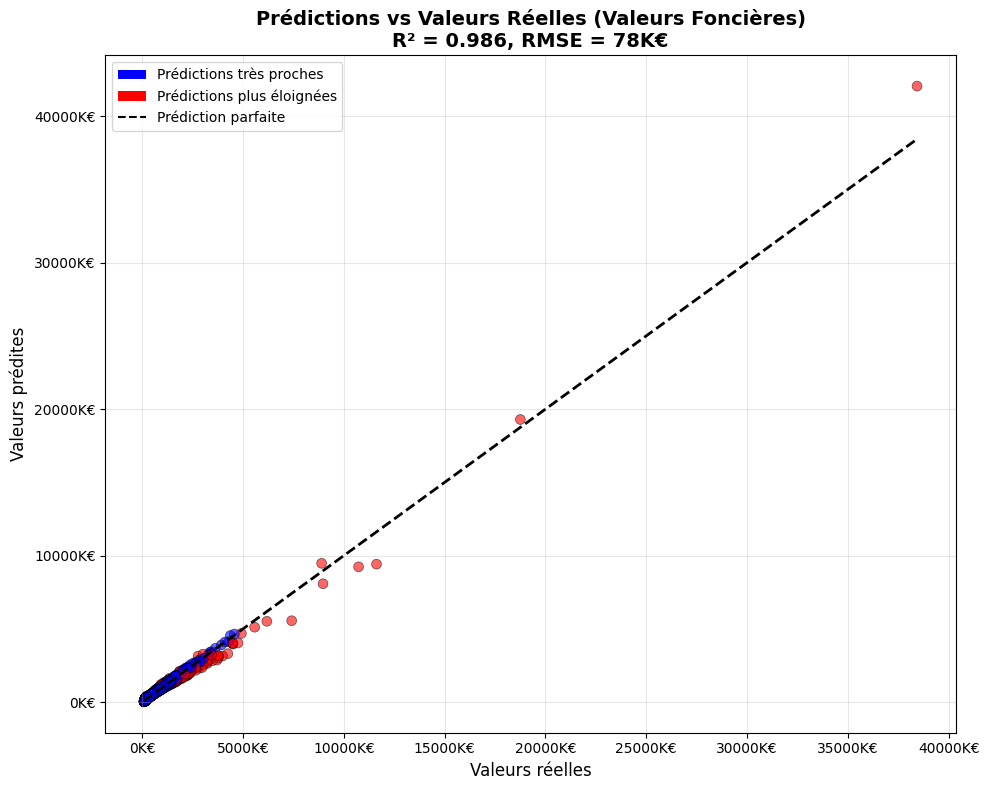

Valeur minimale réelle: 94K€
Valeur maximale réelle: 38434K€
Valeur moyenne réelle: 490K€
RMSE: 78K€


In [103]:
# Faire un scatter_plot de y_test et y_pred avec formatage des valeurs foncières
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 8))

# Calculer les erreurs, seuil à 200K de diff
errors = np.abs(y_test - y_pred)
error_seuil = 200000
# Créer les couleurs basées sur l'erreur
colors = ['red' if error > error_seuil else 'blue' for error in errors]

# Scatter plot avec deux couleurs
scatter = plt.scatter(y_test, y_pred, c=colors, alpha=0.6, s=50,
                     edgecolors='black', linewidth=0.5)

# Ligne de référence parfaite (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2, label='Prédiction parfaite')

# Fonction pour formater les valeurs en milliers d'euros
def format_euros(x, pos):
    """Formate les valeurs en milliers d'euros (K€)"""
    return f'{x/1000:.0f}K€'

# Appliquer le formatage aux axes
formatter = FuncFormatter(format_euros)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter des métriques
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title(f'Prédictions vs Valeurs Réelles (Valeurs Foncières)\nR² = {r2:.3f}, RMSE = {rmse/1000:.0f}K€',
          fontsize=14, fontweight='bold')

# Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Prédictions très proches'),
                   Patch(facecolor='red', label='Prédictions plus éloignées'),
                   plt.Line2D([0], [0], color='black', linestyle='--', label='Prédiction parfaite')]
plt.legend(handles=legend_elements, loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optionnel : Afficher quelques statistiques sur les valeurs
print(f"Valeur minimale réelle: {y_test.min()/1000:.0f}K€")
print(f"Valeur maximale réelle: {y_test.max()/1000:.0f}K€")
print(f"Valeur moyenne réelle: {y_test.mean()/1000:.0f}K€")
print(f"RMSE: {rmse/1000:.0f}K€")

pour une meilleur visu on va rapprocher le graphique sur 300 000€

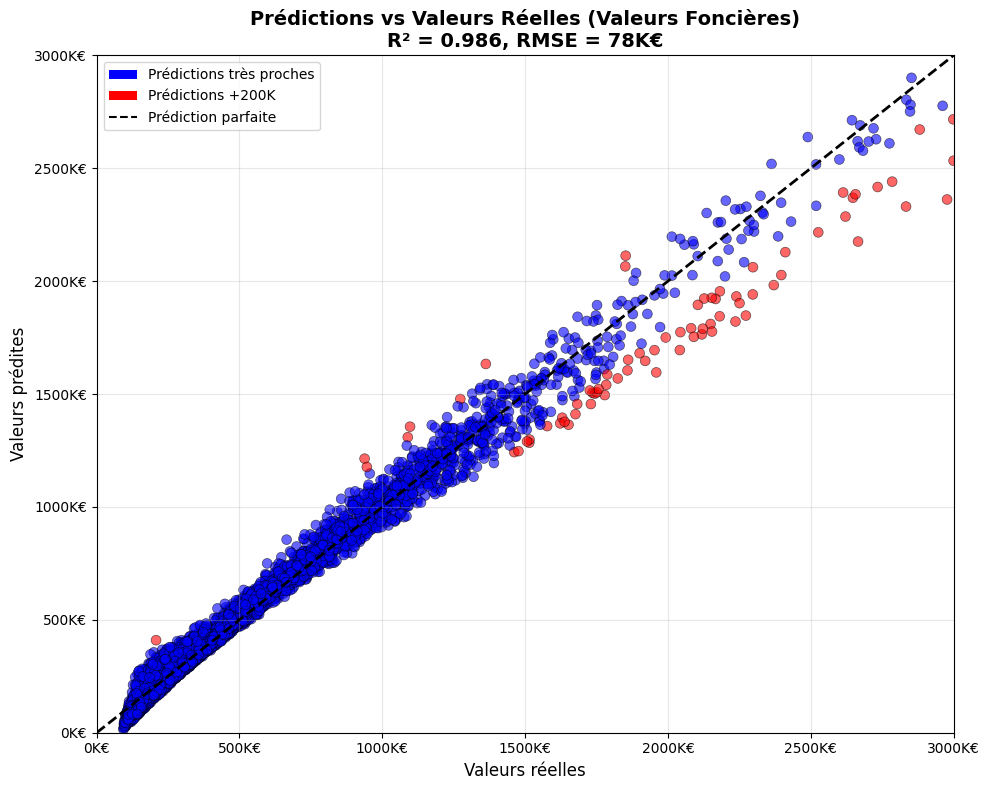

Valeur minimale réelle: 94K€
Valeur maximale réelle: 38434K€
Valeur moyenne réelle: 490K€
RMSE: 78K€
Nombre de points au-dessus de 3000K€: 41 (masqués pour une meilleure visualisation)


In [104]:
# Faire un scatter_plot de y_test et y_pred avec formatage des valeurs foncières
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 8))

# Calculer les erreurs, seuil à 200K de diff
errors = np.abs(y_test - y_pred)
error_seuil = 200000
# Créer les couleurs basées sur l'erreur
colors = ['red' if error > error_seuil else 'blue' for error in errors]

# Scatter plot avec deux couleurs
scatter = plt.scatter(y_test, y_pred, c=colors, alpha=0.6, s=50,
                     edgecolors='black', linewidth=0.5)

# Ligne de référence parfaite (y=x) - limitée à 3000K€
max_limit = 3000000  # 3000K€ en valeur absolue
plt.plot([0, max_limit], [0, max_limit],
         'k--', lw=2, label='Prédiction parfaite')

# Fonction pour formater les valeurs en milliers d'euros
def format_euros(x, pos):
    """Formate les valeurs en milliers d'euros (K€)"""
    return f'{x/1000:.0f}K€'

# Appliquer le formatage aux axes
formatter = FuncFormatter(format_euros)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Limiter les axes à 3000K€ pour une meilleure visualisation
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

# Ajouter des métriques
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.xlabel('Valeurs réelles', fontsize=12)
plt.ylabel('Valeurs prédites', fontsize=12)
plt.title(f'Prédictions vs Valeurs Réelles (Valeurs Foncières)\nR² = {r2:.3f}, RMSE = {rmse/1000:.0f}K€',
          fontsize=14, fontweight='bold')

# Légende personnalisée
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Prédictions très proches'),
                   Patch(facecolor='red', label='Prédictions +200K'),
                   plt.Line2D([0], [0], color='black', linestyle='--', label='Prédiction parfaite')]
plt.legend(handles=legend_elements, loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optionnel : Afficher quelques statistiques sur les valeurs
print(f"Valeur minimale réelle: {y_test.min()/1000:.0f}K€")
print(f"Valeur maximale réelle: {y_test.max()/1000:.0f}K€")
print(f"Valeur moyenne réelle: {y_test.mean()/1000:.0f}K€")
print(f"RMSE: {rmse/1000:.0f}K€")

# Compter les points au-dessus de 3000K€
points_above_limit = np.sum((y_test > max_limit) | (y_pred > max_limit))
print(f"Nombre de points au-dessus de 3000K€: {points_above_limit} (masqués pour une meilleure visualisation)")

# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [105]:
#On importe les données dans un dataframe
dataset_url = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/portefeuille_actifs+(3).xlsx"
df_port = pd.read_excel(dataset_url)

In [106]:

print(df_port.shape)
print(df_port.dtypes)
df_port.head()

(275, 12)
adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.4100,2,Appartement,25,1,2.3496,48.8632
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.4700,2,Appartement,22,1,2.3570,48.8679
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.4800,2,Appartement,65,3,2.3649,48.8593
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.2900,2,Appartement,74,2,2.3016,48.8689
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.5800,2,Appartement,22,1,2.3116,48.8755


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [107]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_port_reg=df_port[['surface_reelle_bati', 'code_postal', 'type_local']].copy()
#renommer surface_reelle_bati en surface_reelle
df_port_reg.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_port_reg['timestamp'] = int(pd.Timestamp('2022-12-31', tz='UTC').timestamp()) #encode le temps en secondes depuis 1970
df_port_reg.head()

,surface_reelle,code_postal,type_local,timestamp
0,25,75001,Appartement,1672444800
1,22,75003,Appartement,1672444800
2,65,75003,Appartement,1672444800
3,74,75008,Appartement,1672444800
4,22,75008,Appartement,1672444800


In [108]:
#Conversion du dataframe en str
df_port_reg.columns = df_port_reg.columns.astype(str)
#refaire le get_dummies
df_port_reg = pd.get_dummies(df_port_reg, columns=['code_postal', 'type_local'], dtype=int)
df_port_reg.head()

,surface_reelle,timestamp,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,code_postal_75010,code_postal_75011,code_postal_75012,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,1672444800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22,1672444800,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,65,1672444800,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,74,1672444800,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22,1672444800,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [109]:
#On effectue la prédiction
df_port['valeur_fonciere_prevue']  = reg.predict(df_port_reg)
#On vérifie les 10 premières valeurs
df_port.head(10)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,valeur_fonciere_prevue
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.4100,2,Appartement,25,1,2.3496,48.8632,431444.3491
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.4700,2,Appartement,22,1,2.3570,48.8679,368861.3900
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.4800,2,Appartement,65,3,2.3649,48.8593,827086.3581
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.2900,2,Appartement,74,2,2.3016,48.8689,878984.8520
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.5800,2,Appartement,22,1,2.3116,48.8755,324852.3324
5,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,33.4000,2,Appartement,35,1,2.3116,48.8755,463385.4623
6,52,RUE DES GRAVILLIERS,75003,75103,Paris 3e Arrondissement,21.3500,2,Appartement,24,2,2.3556,48.8644,390174.1792
7,208,RUE SAINT MAUR,75010,75110,Paris 10e Arrondissement,54.6900,2,Appartement,60,3,2.3719,48.8732,642454.1305
8,142,RUE DE COURCELLES,75017,75117,Paris 17e Arrondissement,9.3000,2,Appartement,11,1,2.3004,48.8825,139736.7846
9,52,RUE LAMARCK,75018,75118,Paris 18e Arrondissement,12.8800,2,Appartement,13,1,2.3421,48.8894,141906.8676


In [110]:
from google.colab import files
#export excel de df_port
df_port.to_excel('portefeuil_predict.xlsx', index=False)
files.download('portefeuil_predict.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [111]:
#Valorisation du portefeuille sur le segment des particuliers
valorisation_particuliers = round(df_port[df_port['type_local'] == 'Appartement']['valeur_fonciere_prevue'].sum() /1000000,2)
print(f'la valorisation du segment particulier est : {valorisation_particuliers} M€')


la valorisation du segment particulier est : 71.05 M€


In [112]:
#Valorisation du portefeuille sur le segment corporate
valorisation_corporate = round(df_port[df_port['type_local'] == 'Local industriel. commercial ou assimilé']['valeur_fonciere_prevue'].sum() /1000000,2)
print(f'la valorisation du segment corporate est : {valorisation_corporate} M€')


la valorisation du segment corporate est : 97.97 M€


In [113]:
# Calcul de le prix moyen au m2 par type de local
#ajouter la colonne prix_m2
df_port['prix_m2'] = df_port['valeur_fonciere_prevue'] / df_port['surface_reelle_bati']

moyenne_par_type = df_port.groupby('type_local')['prix_m2'].mean()

print("--- prix moyen au m2 par type de local ---")
print(moyenne_par_type)

--- prix moyen au m2 par type de local ---
type_local
Appartement                                11589.3979
Local industriel. commercial ou assimilé   14059.5841
Name: prix_m2, dtype: float64


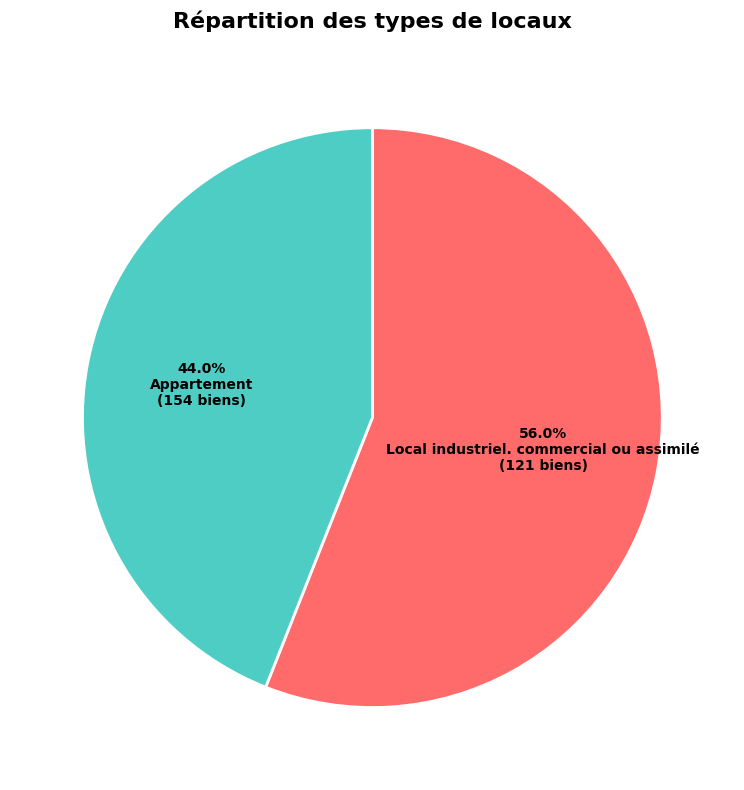

In [114]:
#ajout d'un graphe representant le % de type de biens détenus
plt.figure(figsize=(10, 8))
type_bien = df_port['type_local'].value_counts()

# Couleurs personnalisées pour 2 types
colors = ['#FF6B6B', '#4ECDC4']

# Création du camembert avec noms et pourcentages
wedges, texts, autotexts = plt.pie(type_bien,
        autopct=lambda pct: f'{pct:.1f}%\n{type_bien.index[int(pct/100*len(type_bien))]}\n({type_bien.values[int(pct/100*len(type_bien))]} biens)',
        startangle=90,
        counterclock=False,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Style des textes dans le camembert
for autotext in autotexts:
    lines = autotext.get_text().split('\n')
    autotext.set_text(f'{lines[0]}\n{lines[1]}\n{lines[2]}')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.title('Répartition des types de locaux', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- C'est le segment Corporate qui a la plus grande valorisation
- on se base sur une évolution linéaire, cependant on a vu que sur 2020/2021 la tendence a stoppée puis est repartie, ce qui va fausser legerement la prediction.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [115]:
#On importe les données dans un dataframe

dataset_url = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/echantillon_a_classer2.xlsx"
df_class = pd.read_excel(dataset_url)
df_class.head()


,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.0833,75019,Paris 19e Arrondissement,88
1,452050.7622,75019,Paris 19e Arrondissement,45
2,193088.6536,75019,Paris 19e Arrondissement,21
3,303012.5494,75019,Paris 19e Arrondissement,32
4,149272.2001,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [116]:
#calculer le prix au mètre carré en divisant la valeur foncière par la surface
df_class['prix_m2'] = df_class['valeur_fonciere'] / df_class['surface_reelle']
#supprimer les colonnes valeur_fonciere et surface_reelle
df_class.drop(['valeur_fonciere', 'surface_reelle','nom_commune'], axis=1, inplace=True)

df_class.head()


,code_postal,prix_m2
0,75019,9871.4441
1,75019,10045.5725
2,75019,9194.6978
3,75019,9469.1422
4,75019,7463.6100


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [117]:
from sklearn.cluster import KMeans
X = df_class[['prix_m2']].values


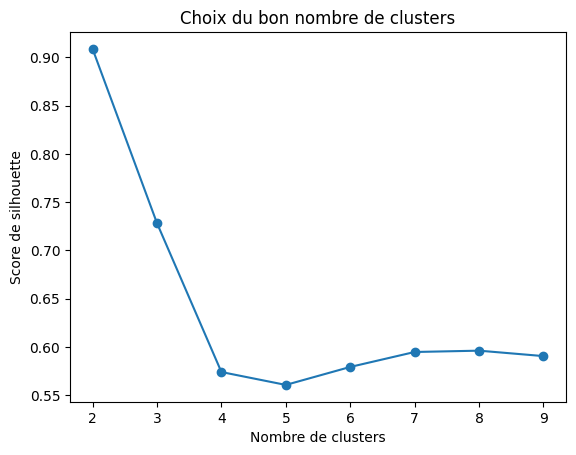

In [118]:
#verification du nombre de cluster optimal (2 normalement)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=808, n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores,marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.title("Choix du bon nombre de clusters")
plt.show()

In [119]:
# Application de K-means avec k=2 clusters
kmeans = KMeans(n_clusters=2, random_state=808, n_init='auto')
df_class['cluster'] = kmeans.fit_predict(X)



In [120]:
# On vérifie les données de la prédiction
df_class

,code_postal,prix_m2,cluster
0,75019,9871.4441,0
1,75019,10045.5725,0
2,75019,9194.6978,0
3,75019,9469.1422,0
4,75019,7463.6100,1
5,75019,9982.0169,0
6,75019,9674.2628,0
7,75019,7348.9174,1
8,75019,9789.0514,0
9,75019,7616.4210,1


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. On peux verifier quel cluster est appt  ou local comemrcial :On prends les 2 valeurs centrales des deux clusters, le plus petit est le cluster appartement

In [121]:
#On va mettre la colonne type de bien en fonction du cluster 0/1.
#on peux chercher a quel cluster les appt ont été assignés (prix le plus bas)
# Afficher les centres des clusters
print("Centres des clusters :")
print(f"Cluster 0 : {kmeans.cluster_centers_[0][0]:.2f} €/m²")
print(f"Cluster 1 : {kmeans.cluster_centers_[1][0]:.2f} €/m²")
# si kmeans.cluster_centers_[0][0] est plus grand que kmeans.cluster_centers_[1][0] alors la variable appt=1 sion 0
appt = 1 if kmeans.cluster_centers_[0][0] > kmeans.cluster_centers_[1][0] else 0
print(f"Le cluster appartement est {appt}")
#on ajoute la colonne type de bien à df_class : si la colonne cluster= appt alors "appartement", sinon "local commercial"
df_class['type_bien'] = np.where(df_class['cluster'] == appt, 'Appartement', 'Local commercial')


Centres des clusters :
Cluster 0 : 9806.92 €/m²
Cluster 1 : 7408.78 €/m²
Le cluster appartement est 1


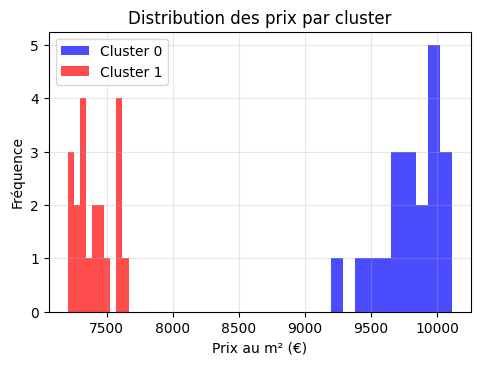

In [122]:
# Visualisation
plt.figure(figsize=(12, 8))

# Graphique 1 : Distribution des prix avec clusters
plt.subplot(2, 2, 1)
colors = ['blue', 'red']
for i in range(2):
    cluster_data = df_class[df_class['cluster'] == i]['prix_m2']
    plt.hist(cluster_data, alpha=0.7, label=f'Cluster {i}', color=colors[i], bins=10)
plt.xlabel('Prix au m² (€)')
plt.ylabel('Fréquence')
plt.title('Distribution des prix par cluster')
plt.legend()
plt.grid(True, alpha=0.3)

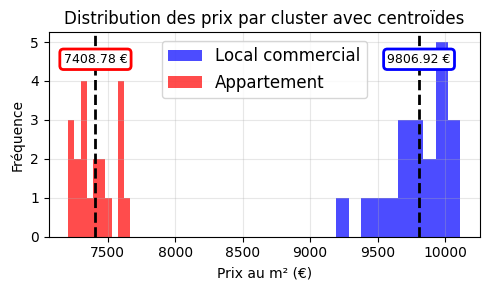

In [123]:
# Centroides
centroids = kmeans.cluster_centers_[:, 0]
nbr_cluster = kmeans.n_clusters

# Mapping des clusters vers les types de biens pour la legende
cluster_labels = {0: "Local commercial", 1: "Appartement"}
if appt == 1:  # Si appt=1, alors cluster 1 = appartement
    cluster_labels = {0: "Local commercial", 1: "Appartement"}
else:  # Si appt=0, alors cluster 0 = appartement
    cluster_labels = {0: "Appartement", 1: "Local commercial"}


# Visualisation
plt.figure(figsize=(5, 3))

# Histogrammes
colors = ['blue', 'red']
for i in range(nbr_cluster):
    cluster_data = df_class[df_class['cluster'] == i]['prix_m2']
    plt.hist(cluster_data, alpha=0.7, label=cluster_labels[i], color=colors[i], bins=10)

    # Ligne noire pour centroïde
    plt.axvline(centroids[i], color='black', linestyle='--', linewidth=2)

#  Affichage des annotations après le tracé, pour avoir le bon ylim
y_max = plt.ylim()[1]
y_text = y_max * 0.90  # Hauteur fixe identique pour les deux

for i in range(nbr_cluster):
    plt.text(centroids[i], y_text,
             f'{centroids[i]:.2f} €',
             color='black', ha='center', va='top', fontsize=9,
             bbox=dict(boxstyle="round", fc="white", ec=colors[i], lw=2))

# Mise en forme
plt.xlabel('Prix au m² (€)')
plt.ylabel('Fréquence')
plt.title('Distribution des prix par cluster avec centroïdes')
plt.legend(loc='upper center', fontsize='large')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


visu en scatter plot plus adaptée, avec un decalage aleatoire sur l'axe Y pour ne pas avoir une simple ligne de points

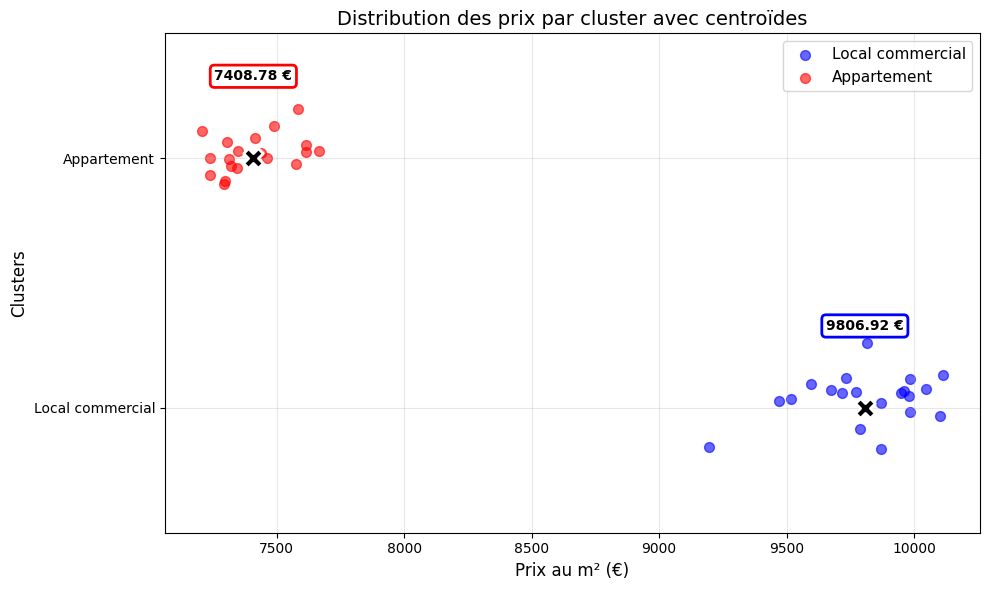

In [124]:

# Centroides
centroids = kmeans.cluster_centers_[:, 0]
nbr_cluster = kmeans.n_clusters

# Mapping des clusters vers les types de biens pour la legende
cluster_labels = {0: "Local commercial", 1: "Appartement"}
if appt == 1:  # Si appt=1, alors cluster 1 = appartement
    cluster_labels = {0: "Local commercial", 1: "Appartement"}
else:  # Si appt=0, alors cluster 0 = appartement
    cluster_labels = {0: "Appartement", 1: "Local commercial"}

# Visualisation
plt.figure(figsize=(10, 6))

# Scatter plot
colors = ['blue', 'red']
for i in range(nbr_cluster):
    cluster_data = df_class[df_class['cluster'] == i]

    # Points du cluster avec un peu de décallage vertical pour éviter la superposition
    y_decal = np.random.normal(i, 0.1, len(cluster_data))

    plt.scatter(cluster_data['prix_m2'], y_decal,
               alpha=0.6, label=cluster_labels[i], color=colors[i], s=50)

# Points noirs pour les centroïdes
for i in range(nbr_cluster):
    plt.scatter(centroids[i], i, color='black', s=200, marker='X',
               edgecolors='white', linewidth=2, zorder=5)

    # Annotation des centroïdes
    plt.text(centroids[i], i + 0.3,
             f'{centroids[i]:.2f} €',
             color='black', ha='center', va='bottom', fontsize=10, weight='bold',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[i], lw=2))

# Mise en forme
plt.xlabel('Prix au m² (€)', fontsize=12)
plt.ylabel('Clusters', fontsize=12)
plt.title('Distribution des prix par cluster avec centroïdes', fontsize=14)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

# Personnalisation de l'axe Y
plt.yticks([0, 1], [cluster_labels[0], cluster_labels[1]])
plt.ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

In [125]:
#On affiche les résultats
#on supprime la colonne cluster
df_class.drop('cluster', axis=1, inplace=True)
print(f"- {len(df_class[df_class['type_bien'] == 'Appartement'])} biens classés comme appartements")
print(f"- {len(df_class[df_class['type_bien'] == 'Local commercial'])} biens classés comme locaux commerciaux")
df_class.head()


- 20 biens classés comme appartements
- 20 biens classés comme locaux commerciaux


,code_postal,prix_m2,type_bien
0,75019,9871.4441,Local commercial
1,75019,10045.5725,Local commercial
2,75019,9194.6978,Local commercial
3,75019,9469.1422,Local commercial
4,75019,7463.6100,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :

- Nous avons réussi à créer un modèle de Machine Learning qui prédit les prix immobiliers parisiens avec 98,6% de précision et une erreur moyenne de seulement 78 000€.

- Nous avons appliqué notre modèle afin de prédire et valoriser le portefeuille immobilier de la société, avec des locaux commerciaux valorisés à 97,97 M€
 et des appartements valorisés à  71.05 M€.

- Nous avons pu classifier le jeu de données du client en deux clusters distincts afin de déterminer le type de bien, 20 biens ont été classés en «local commercial» et 20 en «appartement».

- il nous manque des informations pour la prediction: type de quartier,bien d'exception etc...  On ne pourra prédire des prix "hors normes"
- Les appartements de standing exceptionnel ou locaux dégradés peuvent fausser les centroïdes et la prédiction.